In [1]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ganiyuopeyemi/desktop/NLP/Satzveri2_36_Itemslong_short.txt', error_bad_lines=False)
df.head()

,Column 1,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent
0,0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4
1,1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7
2,2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6
3,3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7
4,4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6


In [3]:
df.shape

(561, 7)

In [4]:
df.isna().sum()

Column 1               0
Satz                   0
noun                   0
polarity_noun          0
adjective              0
polarity_adj           0
valence_rating_sent    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Column 1             561 non-null    int64 
 1   Satz                 561 non-null    object
 2   noun                 561 non-null    object
 3   polarity_noun        561 non-null    object
 4   adjective            561 non-null    object
 5   polarity_adj         561 non-null    object
 6   valence_rating_sent  561 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 30.8+ KB


In [6]:
df = df.drop(columns = ['Column 1'])

In [7]:
df["noun"].value_counts().sum()

561

In [8]:
#df["noun"].unique()

In [9]:
#df['adjective'].unique()

In [10]:
df["adjective"].value_counts().sum()

561

In [11]:
df["polarity_noun"].value_counts()

positiv    281
negativ    280
Name: polarity_noun, dtype: int64

In [12]:
df["polarity_adj"].value_counts()

positiv    189
negativ    188
neutral    184
Name: polarity_adj, dtype: int64

In [13]:
df["valence_rating_sent"].value_counts()

5    101
4     99
3     89
2     82
6     73
7     49
1     44
8     23
9      1
Name: valence_rating_sent, dtype: int64

Text(0, 0.5, 'Label')

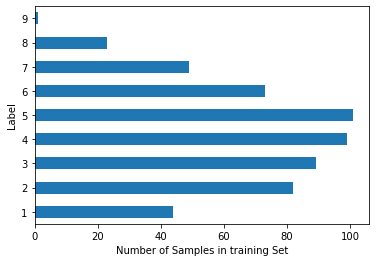

In [14]:
ax = df["valence_rating_sent"].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

In [15]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["Satz"]), axis=1)


In [16]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]"
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]"
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]"
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]"
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]"


In [17]:
#TC = '250kSentiArt_EN.xlsx' 
sa = pd.read_excel('/Users/ganiyuopeyemi/desktop/NLP/SentiArt-main/120kSentiArt_DE.xlsx') #    
print(sa)

              word      wordLC    AAPz  ang_z  fear_z  disg_z   hap_z   sad_z  \
0           Aachen      aachen  0.6557  0.097 -1.0980 -1.2940 -0.4470 -1.3020   
1              Aal         aal  0.3076  0.234 -0.4620  1.4168 -0.1940  0.1161   
2             Aale        aale  0.0619  0.218 -0.1440  0.4773 -0.1210 -0.1830   
3              Aas         aas -1.0440  0.258  0.1618  2.0333  0.3128  0.3957   
4       Aasfresser  aasfresser -1.5150  0.327  1.1859  1.9843  0.2766  0.6850   
...            ...         ...     ...    ...     ...     ...     ...     ...   
116308     üppigem     üppigem  2.1710  0.152 -1.6270 -0.1590  0.9881  0.3765   
116309     üppigen     üppigen  2.0481  0.127 -1.6160 -0.7360  0.4093  0.0004   
116310     üppiger     üppiger  2.0276  0.143 -1.5920 -0.6580  0.6143  0.1836   
116311   üppigeren   üppigeren  1.5157  0.078 -1.6630 -1.2940 -0.3500 -0.7420   
116312     üppiges     üppiges  1.6386  0.134 -1.5450 -0.3550  0.6625 -0.1350   

        surp_z  
0      -0.

In [18]:
sa = pd.DataFrame(sa)

In [19]:
sa[sa.word == "ist"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
89714,ist,ist,0.2667,0.185,0.0794,-0.521,0.3249,-0.26,0.7149


In [20]:
sa[sa.word == "der"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74617,der,der,0.2257,0.203,0.2325,-0.814,0.0234,-0.916,0.7538


In [21]:
sa[sa.word == "die"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74808,die,die,0.1848,0.276,0.8681,-0.462,0.3611,-0.308,0.9097


In [22]:
sa[sa.word == "das"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74227,das,das,0.3281,0.254,0.5385,-0.139,0.7349,0.1064,0.9486


In [23]:
sa.head()

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
0,Aachen,aachen,0.6557,0.097,-1.0980,-1.2940,-0.4470,-1.3020,-0.6360
1,Aal,aal,0.3076,0.234,-0.4620,1.4168,-0.1940,0.1161,-0.3240
2,Aale,aale,0.0619,0.218,-0.1440,0.4773,-0.1210,-0.1830,0.0135
3,Aas,aas,-1.0440,0.258,0.1618,2.0333,0.3128,0.3957,-0.8440
4,Aasfresser,aasfresser,-1.5150,0.327,1.1859,1.9843,0.2766,0.6850,0.5720


In [24]:
my_list = []
for word in df.tokenized_sents:
    my_list.append(word)

In [25]:
nouns = []
for noun in df.noun:
    nouns.append(noun)

In [26]:
adjs = []
for adj in df.adjective:
    adjs.append(adj)

In [27]:
len(my_list)

561

In [28]:
len(nouns)

561

In [29]:
len(adjs)

561

In [30]:
sent_AAPz_Satz = []
for t in my_list:
    dt = sa.query('word in @t')
    sent_AAPz_Satz.append(dt.AAPz.mean())
   

In [31]:
sent_APPz_noun = []
for t in nouns:
    dt = sa.query('word in @t')
    sent_APPz_noun.append(dt.AAPz.mean())
   

In [32]:
sent_APPz_adj= []
for t in adjs:
    dt = sa.query('word in @t')
    sent_APPz_adj.append(dt.AAPz.mean())
   

In [33]:
df['senti_sent'] = sent_AAPz_Satz
df['senti_noun'] =sent_APPz_noun
df['senti_adj'] = sent_APPz_adj
df = round(df,3)

In [34]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]",0.806,0.942,1.209
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]",0.628,0.922,0.697
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]",1.277,2.335,1.229
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]",0.431,0.349,0.676
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]",0.744,1.802,0.164


In [35]:
print(df.senti_sent.isna().sum())
print(df.senti_noun.isna().sum())
print(df.senti_adj.isna().sum())

0
18
30


In [36]:
missing_noun = df.loc[pd.isna(df["senti_noun"]), 'noun']
missing_noun

64     Hochzeitsfeier
73       Schulmädchen
173          Raufbold
174          Folterer
186           Rassist
187           Prahler
242             Disco
254    Hochzeitsfeier
364          Folterer
374           Rassist
375           Prahler
429             Disco
439    Hochzeitsfeier
449      Schulmädchen
546          Raufbold
547          Folterer
558           Rassist
559           Prahler
Name: noun, dtype: object

In [37]:
missing_adjective = df.loc[pd.isna(df["senti_adj"]), 'adjective']
missing_adjective

18             weise
53            schick
64         ehrwürdig
74        einfühlsam
112            weise
147           schick
158        ehrwürdig
169       einfühlsam
210    selbstgefälli
273        intrigant
276           dement
280         pickelig
283          toxisch
305    selbstgefälli
368        intrigant
371           dement
373         pickelig
376          toxisch
377          lautlos
425         russisch
456         gehorsam
458       manierlich
460         türkisch
467        unbehaart
469          lautlos
516         russisch
548         gehorsam
550       manierlich
552         türkisch
559        unbehaart
Name: adjective, dtype: object

In [38]:
df = df.dropna()

In [39]:
df.shape

(515, 10)

In [40]:
df_1 = df[["senti_sent","senti_noun","senti_adj"]]

In [41]:
df_1.corr()

,senti_sent,senti_noun,senti_adj
senti_sent,1.000000,0.681723,0.759809
senti_noun,0.681723,1.000000,0.042373
senti_adj,0.759809,0.042373,1.000000


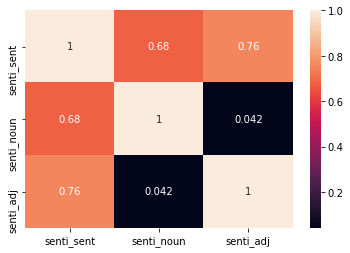

In [42]:
corrmatrix =(df_1.corr())
sns.heatmap(df_1.corr(), annot=True)

In [43]:
df.groupby(["valence_rating_sent","polarity_noun"])["valence_rating_sent"].count()

valence_rating_sent  polarity_noun
1                    negativ          20
                     positiv          15
2                    negativ          47
                     positiv          31
3                    negativ          50
                     positiv          31
4                    negativ          51
                     positiv          40
5                    negativ          52
                     positiv          42
6                    negativ          19
                     positiv          47
7                    negativ          15
                     positiv          32
8                    negativ           1
                     positiv          21
9                    positiv           1
Name: valence_rating_sent, dtype: int64

In [44]:
df.groupby(["valence_rating_sent","polarity_adj"])["valence_rating_sent"].count()

valence_rating_sent  polarity_adj
1                    negativ         29
                     neutral          3
                     positiv          3
2                    negativ         57
                     neutral         13
                     positiv          8
3                    negativ         39
                     neutral         31
                     positiv         11
4                    negativ         25
                     neutral         47
                     positiv         19
5                    negativ         16
                     neutral         41
                     positiv         37
6                    negativ          7
                     neutral         16
                     positiv         43
7                    neutral         13
                     positiv         34
8                    neutral          2
                     positiv         20
9                    positiv          1
Name: valence_rating_sent, dtype: int64

In [92]:
df.groupby(["senti_noun","senti_adj"])["senti_sent"].count()

senti_noun  senti_adj
negativ     negativ      123
            neutral        2
            positiv      137
neutral     negativ        5
            positiv       10
positiv     negativ      111
            neutral        4
            positiv      123
Name: senti_sent, dtype: int64

In [46]:
df["score"] = pd.cut(df["senti_sent"],
                            bins=9,
                            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
df[df["score"]==9]

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj,score
28,Der Gesang ist anmutig.,Gesang,positiv,anmutig,positiv,8,"[Der, Gesang, ist, anmutig, .]",1.789,2.232,2.867,9
61,Die Orchidee ist makellos.,Orchidee,positiv,makellos,positiv,5,"[Die, Orchidee, ist, makellos, .]",1.611,2.355,2.212,9
63,Der Geburtstag ist wunderschön.,Geburtstag,positiv,wunderschön,positiv,7,"[Der, Geburtstag, ist, wunderschön, .]",1.488,0.942,3.256,9


In [48]:
df[df["valence_rating_sent"]==9]

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj,score
41,Die Kellnerin ist dankbar.,Kellnerin,positiv,dankbar,positiv,9,"[Die, Kellnerin, ist, dankbar, .]",0.546,0.226,1.147,6


In [49]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,f1_score



In [50]:
f1_macro = f1_score(df["valence_rating_sent"], df["score"], average='macro')
acc = accuracy_score(df["valence_rating_sent"], df["score"])*100
print("f1_macro of valence rating vs AAPz:", round(f1_macro, 3))
print("accuracy of valence rating vs AAPz is:", round(acc,3), "%")

f1_macro of valence rating vs AAPz: 0.158
accuracy of valence rating vs AAPz is: 19.223 %


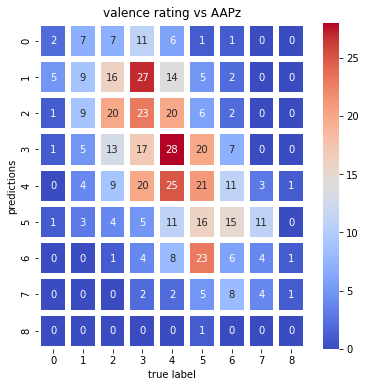

In [51]:
confusion_matrix = metrics.confusion_matrix(df["valence_rating_sent"], df["score"])
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True, linewidths=5, fmt='d', ax=ax, cmap= 'coolwarm')
plt.title("valence rating vs AAPz")
plt.xlabel("true label");
plt.ylabel("predictions");

In [52]:
df['senti_noun'] =  np.where((df['senti_noun'] <= -0.05), "negativ",  np.where((df['senti_noun'] >= 0.05), "positiv", "neutral"))

In [53]:

df['senti_adj'] =  np.where((df['senti_adj'] <= -0.05), "negativ",  np.where((df['senti_adj'] >= 0.05), "positiv", "neutral"))


In [54]:

df['senti_sent_2'] =  np.where((df['senti_sent'] <= -0.05), -1,  np.where((df['senti_sent'] >= 0.05), 1, 0))

In [55]:
df.groupby(["senti_sent_2","senti_noun","senti_adj"])["senti_sent_2"].count()

senti_sent_2  senti_noun  senti_adj
-1            negativ     negativ      122
                          neutral        2
                          positiv       54
              neutral     negativ        5
              positiv     negativ       51
 0            negativ     negativ        1
                          positiv       17
              positiv     negativ       15
 1            negativ     positiv       66
              neutral     positiv       10
              positiv     negativ       45
                          neutral        4
                          positiv      123
Name: senti_sent_2, dtype: int64

In [56]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj,score,senti_sent_2
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]",0.806,positiv,positiv,7,1
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]",0.628,positiv,positiv,6,1
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]",1.277,positiv,positiv,8,1
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]",0.431,positiv,positiv,6,1
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]",0.744,positiv,positiv,7,1


In [57]:
df[df["senti_noun"]==0]

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj,score,senti_sent_2


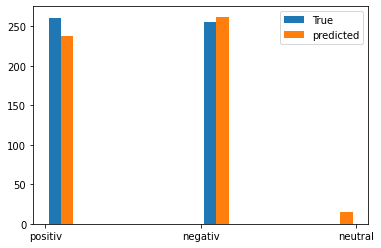

In [58]:
plt.hist([df.polarity_noun, df.senti_noun], label = ["True", "predicted"])
plt.legend(loc='upper right')
plt.show()

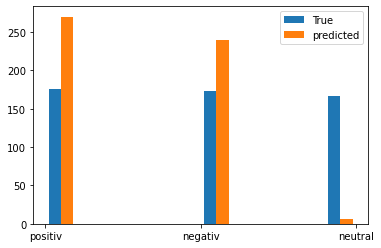

In [59]:
plt.hist([df.polarity_adj, df.senti_adj], label = ["True", "predicted"])
plt.legend(loc='upper right')
plt.show()

In [60]:
f1_macro = f1_score(df["polarity_noun"], df["senti_noun"], average='macro')
acc = accuracy_score(df["polarity_noun"], df["senti_noun"])*100
print("f1_macro of polarity noun vs senti noun:", round(f1_macro, 3))
print("accuracy of polarity noun vs senti noun:", round(acc,3), "%")

f1_macro of polarity noun vs senti noun: 0.617
accuracy of polarity noun vs senti noun: 91.262 %


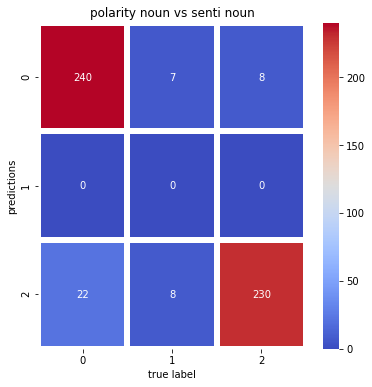

In [61]:
confusion_matrix = metrics.confusion_matrix(df["polarity_noun"], df["senti_noun"])
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True, linewidths=5, fmt='d', ax=ax, cmap= 'coolwarm')
plt.title("polarity noun vs senti noun")
plt.xlabel("true label");
plt.ylabel("predictions");

In [62]:
f1_macro = f1_score(df["polarity_adj"], df["senti_adj"], average='macro')
acc = accuracy_score(df["polarity_adj"], df["senti_adj"])*100
print("f1_macro of polarity adj vs senti adj:", round(f1_macro, 3))
print("accuracy of polarity adj vs senti adj:", round(acc,3), "%")

f1_macro of polarity adj vs senti adj: 0.513
accuracy of polarity adj vs senti adj: 63.107 %


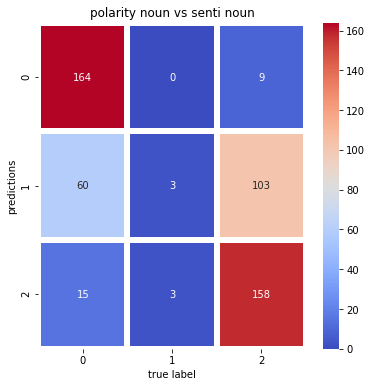

In [63]:
confusion_matrix = metrics.confusion_matrix(df["polarity_adj"], df["senti_adj"])
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True, linewidths=5, fmt='d', ax=ax, cmap= 'coolwarm')
plt.title("polarity noun vs senti noun")
plt.xlabel("true label");
plt.ylabel("predictions");

In [64]:
word_list = []
for t in df.tokenized_sents:
    for word in t:
        word_list.append(word)

In [65]:
print(len(word_list))
print(len(set(word_list)))

2572
455


In [66]:
st_words = []
for word in sa.word:
    st_words.append(word)
print(len(st_words))

116313


In [67]:
match = []
for word in word_list:
    if word in st_words:
        match.append(word)

In [68]:
print(len(set(match)))

451


In [69]:
(len(set(match))/len(set(word_list)))*100

99.12087912087912

In [70]:
df["score"] = pd.cut(df["senti_sent"],
                            bins=9,
                            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Label')

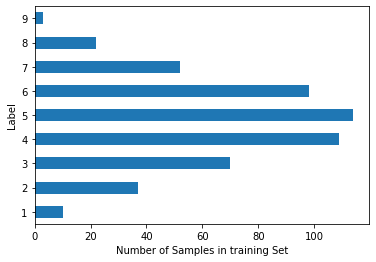

In [71]:
ax = df["score"].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

In [72]:
df["score"].value_counts()

5    114
4    109
6     98
3     70
7     52
2     37
8     22
1     10
9      3
Name: score, dtype: int64

In [73]:
#file = "NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
emolex_df = pd.read_excel("/Users/ganiyuopeyemi/desktop/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
                        ,error_bad_lines=False,encoding= 'unicode_escape',)
emolex_df.head(10)

,English (en),Afrikaans (af),Albanian (sq),Amharic (am),Arabic (ar),Armenian (hy),Azeerbaijani (az),Basque (eu),Belarusian (be),Bengali (bn),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,পশ্চাতে,...,0,0,0,0,0,0,0,0,0,0
1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,গণনা-যন্ত্রবিশেষ,...,0,0,0,0,0,0,0,0,0,1
2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,বর্জিত করা,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,পরিত্যক্ত,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,বিসর্জন,...,0,1,1,0,0,1,0,1,1,0
5,abate,bedaar,i jap fund,አጥፋ,انحسر,քանդել,boşaltın,abate,сціхаць,ক্ষীণ করা,...,0,0,0,0,0,0,0,0,0,0
6,abatement,vermindering,pakësim,መበስበስ,انحسار,նվազեցում,azaldılması,murrizteko,зніжэнне,উপশম,...,0,0,0,0,0,0,0,0,0,0
7,abba,Abba,Abba,abba,أبا,abba,abba,abba,авва,Abba,...,1,0,0,0,0,0,0,0,0,0
8,abbot,abt,abat,አቡኝ,رئيس الدير,աբբոթ,abbot,abade,абат,মঠাধ্যক্ষ,...,0,0,0,0,0,0,0,0,0,1
9,abbreviate,afkort,shkurtoj,አህጽሮት,اختصر,կրճատել,qısaltmaq,laburtu,скарачаць,খাট করা,...,0,0,0,0,0,0,0,0,0,0


In [74]:
emolex_df = emolex_df[["German (de)","Positive","Negative","Anger","Anticipation","Disgust","Fear","Joy","Surprise","Trust"]]

In [75]:
emolex_df = emolex_df.rename(columns = {'German (de)':'German'})

In [76]:
emolex_df.head()

,German,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Surprise,Trust
0,zurück,0,0,0,0,0,0,0,0,0
1,Abakus,0,0,0,0,0,0,0,0,1
2,verlassen,0,1,0,0,0,1,0,0,0
3,verlassen,0,1,1,0,0,1,0,0,0
4,Aufgabe,0,1,1,0,0,1,0,1,0


In [77]:
emolex_df.shape

(14182, 10)

In [78]:
word_list_1 = []
for t in df.tokenized_sents:
    for word in t:
        word_list_1.append(word)

In [79]:
print(len(word_list))
print(len(set(word_list)))

2572
455


In [80]:
word_emo = []
for word in emolex_df.German:
    word_emo.append(word)

In [81]:
print(len(word_emo))
print(len(set(word_emo)))

14182
11340


In [82]:
match_emo = []
for word in word_list_1:
    if word in word_emo:
        match_emo.append(word)

In [83]:
print(len(match_emo))
print(len(set(match_emo)))

611
265


In [84]:
(len(set(match_emo))/len(set(word_list_1)))*100

58.24175824175825

In [85]:
noun_t=[]
for t in df.noun:
    dt = emolex_df.query("German in @t")
    if dt.Positive.mean()==1:
        noun_t.append("positive")
    elif dt.Negative.mean()==1:
        noun_t.append("negative")
    elif dt.Negative.mean()==0 and dt.Positive.mean()==0:
        noun_t.append("neutral")
    else:
        noun_t.append("NaN")
print("len(noun_t)=", len(noun_t))        
print(Counter(noun_t)) 

len(noun_t)= 515
Counter({'NaN': 239, 'negative': 102, 'neutral': 90, 'positive': 84})


In [86]:
adj_t=[]
for t in df.adjective:
    dt = emolex_df.query("German in @t")
    if dt.Positive.mean()==1:
        adj_t.append("positive")
    elif dt.Negative.mean()==1:
        adj_t.append("negative")
    elif dt.Negative.mean()==0 and dt.Positive.mean()==0:
        adj_t.append("neutral")
    else:
        adj_t.append("NaN")
print("len(adj_t)=", len(adj_t))        
print(Counter(adj_t))

len(adj_t)= 515
Counter({'NaN': 248, 'negative': 128, 'positive': 91, 'neutral': 48})


In [87]:
df["noun_emo"]= noun_t
df["adj_emo"]=adj_t

In [88]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_sent,senti_noun,senti_adj,score,senti_sent_2,noun_emo,adj_emo
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]",0.806,positiv,positiv,7,1,neutral,neutral
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]",0.628,positiv,positiv,6,1,positive,NaN
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]",1.277,positiv,positiv,8,1,NaN,NaN
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]",0.431,positiv,positiv,6,1,positive,NaN
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]",0.744,positiv,positiv,7,1,NaN,NaN


In [89]:
f1_macro = f1_score(df["polarity_adj"], df["adj_emo"], average='macro')
acc = accuracy_score(df["polarity_adj"], df["adj_emo"])*100
print( round(f1_macro, 3))
print( round(acc,3), "%")

0.056
6.99 %


In [90]:
f1_macro = f1_score(df["polarity_noun"], df["noun_emo"], average='macro')
acc = accuracy_score(df["polarity_noun"], df["noun_emo"])*100
print(round(f1_macro, 3))
print(round(acc,3), "%")

0.0
0.0 %


In [91]:
TOKEN, MEAN-SENTIMENT-RATING, STANDARD DEVIATION, and RAW-HUMAN-SENTIMENT-RATINGS

SyntaxError: invalid syntax (<ipython-input-91-43a9bf177c72>, line 1)

In [ ]:
GerVader = pd.read_csv('/Users/ganiyuopeyemi/desktop/NLP/GERVaderLexicon.txt',sep='\t',header = None,names = ["token", "msr","sd","rhsr"], error_bad_lines=False)
GerVader.head(49)

In [ ]:
GerVader["msr"].max()

In [ ]:
GerVader.shape

In [ ]:
word_list_1 = []
for word in df.WORD:
    word_list_1.append(word)
print(len(word_list_1))
print(len(set(word_list_1)))

In [ ]:
vd_word = []
for word in GerVader.token:
    vd_word.append(word)
print(len(vd_word))
print(len(set(vd_word)))    

In [ ]:
""""match_1 = []
for word in word_list_1:
    if word in vd_word:
        match_1.append(word)
print(len(match_1))
print(len(set(match_1)))"""

In [ ]:
"""valence_emo1=[]
for t in df.WORD:
    dt = GerVader.query("token in @t")
    if dt.msr.mean()>=0.05:
        valence_emo1.append("positive")
    elif dt.msr.mean()<=-0.05:
        valence_emo1.append("negative")
    elif dt.msr.mean()==0 and dt.msr.mean()==0:
        valence_emo1.append("neutral")
    else:
        valence_emo1.append("NaN")
print("len(valence_emo1)=", len(valence_emo1))        
print(Counter(valence_emo1))"""